<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Hands-on Lab: Final Project: Generative AI for Data Science
**Estimated Effort: 60 mins**
### **Project Scenario**
You have been employed as a Data Scientist by a consultancy firm. The firm has a client who is a used car dealer. They have a special feature on Ford cars and they want your firm to design a model that can predict the optimum quotation price for the cars in their lot. They provide you with sales data for the past few years. The dataset contains different features of the cars and the price they were sold at.

The tasks assigned to you are as follows.

There might be a few duplicate entries and a few missing values in the dataset. Data cleaning will be a part of the assignment.
You have to perform exploratory data analysis to draw keen insights on the data and determine the effect of different features on the price. Some specific requests by the client include:
a. Identify number of sales for each fuel type
b. Identify which transmission type has more price outliers
Compare the models with linear, polynomial and ridge regressions on single and multiple variables to find the best performing model
Perform a Grid Search on the Ridge regression model to identify the optimum hyperparameter for the model for best performance.
You decide to use Generative AI to create python codes that can help you analyse the data, determine the best features and create the prediction model as per requirement.

*Disclaimer: This is a fictitious scenario created for the purpose of this project. The dataset being used is publicly available.*

### **About the Dataset**
This dataset contains used car sale prices for Ford cars. This is a public dataset available on the Kaggle website as Ford Car Pricing Dataset under the CC0: Public Domain license. The dataset has been slightly modified for the purpose of this project.

Attributes of this dataset have been explained below.

| **Variable**    | **Description**                                        |
|------------------|-------------------------------------------------------|
| model           | Car model name                                        |
| year            | Year of car make                                      |
| transmission    | Type of transmission (Automatic, Manual, or Semi-Auto)|
| mileage         | Number of miles traveled                              |
| fuelType        | The type of fuel the car uses (Petrol, Diesel, Hybrid, Electric, Other) |
| tax             | Annual Tax payable in USD                             |
| mpg             | Miles per Gallon that the car runs at                 |
| engineSize      | Engine Size of the car                                |
| price           | Price of car in USD                                   |



### **Code execution environment**
To test the prompt-generated code, keep the Jupyter Notebook (in the link below) open in a separate tab in your web browser. The notebook has some setup instructions that you should complete now.

[Jupyter-Lite Test Environment](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/jupyterlite/latest/lab/index.html?notebook_url=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/test/jupyter_lite_for_test.jupyterlite.ipynb)

Please note the lab environment above will only work on Windows (Google Chrome or Firefox browser). If you don't have a Windows system with either of these browsers, use the lab environment provided in the next lesson of the module.

The data set for this lab is available in the following URL.

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

Complete the setup in the Jupyter Notebook and then proceed further.

*Important Note: All prompts that are made available have been hidden and the users are encouraged to first try to write their own prompts to create the solutions. Also, the prompts given as solutions have also been maintained as ones which will create generic code structures which you can modify according to the question at hand.*



In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [160]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
df=pd.read_csv(URL)


In [161]:
df.head(10)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
5,Fiesta,2015,Manual,35432,Petrol,145.0,47.9,1.6,10500
6,Puma,2019,Manual,2029,Petrol,145.0,50.4,1.0,22500
7,Fiesta,2017,Manual,13054,Petrol,145.0,54.3,1.2,9000
8,Kuga,2019,Automatic,6894,Diesel,145.0,42.2,2.0,25500
9,Focus,2018,Manual,48141,Petrol,145.0,61.4,1.0,10000


In [162]:
df.shape

(17966, 9)

In [163]:

# Fill missing values with the mean of their respective columns
df = df.fillna(df.mean(numeric_only=True))

# Drop duplicate rows
df = df.drop_duplicates()

# Display the first few rows of the updated dataset
df.head(10)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
5,Fiesta,2015,Manual,35432,Petrol,145.0,47.9,1.6,10500
6,Puma,2019,Manual,2029,Petrol,145.0,50.4,1.0,22500
7,Fiesta,2017,Manual,13054,Petrol,145.0,54.3,1.2,9000
8,Kuga,2019,Automatic,6894,Diesel,145.0,42.2,2.0,25500
9,Focus,2018,Manual,48141,Petrol,145.0,61.4,1.0,10000


1. Identify the 5 attributes that have the highest correlation with the price parameter.
2. Count the number of cars under each unique value of fuelType attribute.
3. Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.
4. Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.

In [164]:
#1. Identify the 5 attributes that have the highest correlation with the price parameter.


correlation_matrix = df[['mileage', 'tax', 'mpg', 'engineSize', 'price']].corr()
print(correlation_matrix)


# Select only numeric columns for correlation
df_numeric = df[['mileage', 'tax', 'mpg', 'engineSize', 'price']]

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Sort the correlations of 'price' in descending order and pick the top 5
top_5_correlated = correlation_matrix['price'].sort_values(ascending=False).head(5)

# Display the top 5 attributes
print(f"\n\n{top_5_correlated}")

             mileage       tax       mpg  engineSize     price
mileage     1.000000 -0.257546  0.117697    0.214692 -0.530483
tax        -0.257546  1.000000 -0.502342    0.185355  0.405970
mpg         0.117697 -0.502342  1.000000   -0.262239 -0.346263
engineSize  0.214692  0.185355 -0.262239    1.000000  0.411451
price      -0.530483  0.405970 -0.346263    0.411451  1.000000


price         1.000000
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


In [165]:
#2. Count the number of cars under each unique value of fuelType attribute.

# Count the number of cars under each unique value of fuelType
fuel_type_counts = df.groupby('fuelType').size()

# Display the result
fuel_type_counts


fuelType
Diesel       5706
Electric        2
Hybrid         22
Other           1
Petrol      12081
dtype: int64

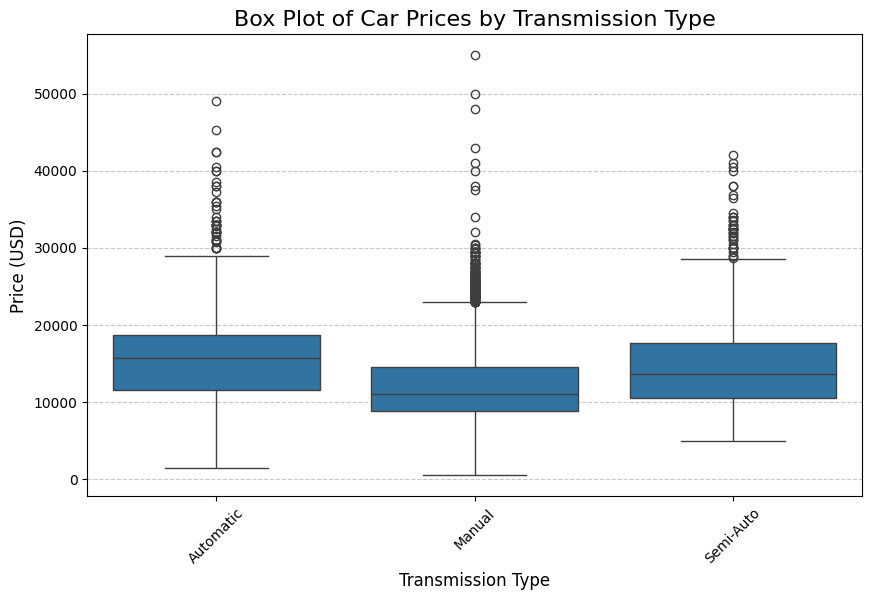

In [166]:
#3. Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.

# Create a box plot to compare price distribution across transmission types
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)

# Add titles and labels
plt.title('Box Plot of Car Prices by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


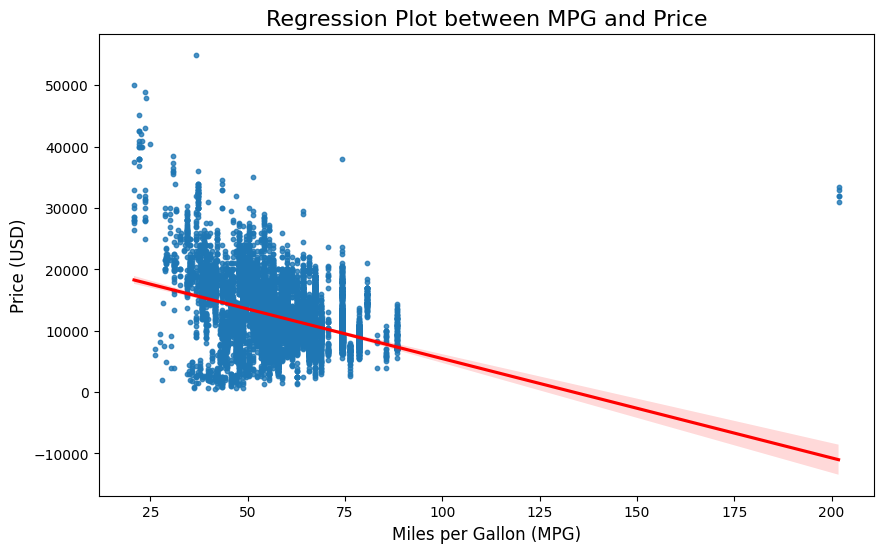

In [167]:
#4. Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.

# Create the regression plot between 'mpg' and 'price'
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Regression Plot between MPG and Price', fontsize=16)
plt.xlabel('Miles per Gallon (MPG)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

# Show the plot
plt.show()


## Model Development and Evaluation

1. Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.

2. Fit a linear regression model to predict the price using the following set of features.
year, mileage, tax, mpg and engineSize.
Calculate the R^2 and MSE values for this model.

3. For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

4. For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

5. Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

6. In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

In [168]:
#1. Fit a linear regression model to predict the price using the feature mpg. Then calculate the R² and MSE values for the model.

# Select the feature 'mpg' and target 'price'
X = df[['mpg']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test)

# Calculate R² and MSE values
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")


R²: 0.1504343741072467
MSE: 19049855.140110783


In [169]:
#2. Fit a linear regression model to predict the price using the following set of features: year, mileage, tax, mpg, and engineSize. Calculate the R² and MSE values for this model.

# Select the features and target
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test)

# Calculate R² and MSE values
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")

R²: 0.6917125923771708
MSE: 6912744.910746368


In [170]:
#3 3. For the same set of features as in the previous question, create a pipeline model object that uses standard scaler, second-degree polynomial features, and a linear regression model. Calculate the R² and MSE values for this model.


# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())

# Fit the model
pipeline.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = pipeline.predict(X_test)

# Calculate R² and MSE values
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")

R²: 0.12122807147170267
MSE: 19704749.61492041


In [171]:
#4. For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R² using the test data.

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = ridge_model.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2}")


R²: 0.6917134446113115


In [172]:
# 5. Perform a second-order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularization parameter to 0.1, and calculate the R² and MSE utilizing the modified test data.

# Apply a second-order polynomial transform
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict the prices on the test set
y_pred = ridge_model.predict(X_test_poly)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")


R²: 0.12127474336707089
MSE: 19703703.08853236


In [173]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the Ridge regression model
ridge = Ridge(alpha=0.1)  # You can experiment with different alpha values
ridge.fit(X_train, y_train)

# Calculate R^2 and MSE for the model
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)


R^2: 0.6917137020847091
MSE: 6912720.027715312


In [174]:
# Load original and synthetic datasets
original_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
# Load original and synthetic datasets
df_uncleaned = pd.read_csv(original_url)  # Original uncleaned data

original_df = df_uncleaned.fillna(df_uncleaned.mean(numeric_only=True))

# Drop duplicate rows
original_df = original_df.drop_duplicates()

# If you choose to use Synthetic data, you can clean it the same way:
df_uncleaned_synthetic = pd.read_csv('synthetic_used_car_price_augmentation_mostly_ai.csv')  # Synthetic uncleaned data
synthetic_df = df_uncleaned_synthetic.fillna(
df_uncleaned_synthetic.mean(numeric_only=True))

# Drop duplicate rows
synthetic_df = synthetic_df.drop_duplicates()

# Task 1: Fit a linear regression model to predict the price using mpg

def fit_linear_regression(df):
    X = df[['mpg']]
    y = df['price']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    return r2, mse

# Compare on both original and synthetic datasets
original_r2_1, original_mse_1 = fit_linear_regression(original_df)
synthetic_r2_1, synthetic_mse_1 = fit_linear_regression(synthetic_df)

print(f"Original Data - Linear Regression R²: {original_r2_1}, MSE: {original_mse_1}")
print(f"Synthetic Data - Linear Regression R²: {synthetic_r2_1}, MSE: {synthetic_mse_1}")


# Task 2: Fit a linear regression model using multiple features (year, mileage, tax, mpg, engineSize)

def fit_multiple_features_linear(df):
    X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
    y = df['price']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    return r2, mse

# Compare on both original and synthetic datasets
original_r2_2, original_mse_2 = fit_multiple_features_linear(original_df)
synthetic_r2_2, synthetic_mse_2 = fit_multiple_features_linear(synthetic_df)

print(f"Original Data - Multiple Features Linear Regression R²: {original_r2_2}, MSE: {original_mse_2}")
print(f"Synthetic Data - Multiple Features Linear Regression R²: {synthetic_r2_2}, MSE: {synthetic_mse_2}")


# Task 3: Create a pipeline model object with polynomial features and linear regression

def fit_polynomial_pipeline(df):
    X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
    y = df['price']
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_scaled)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    return r2, mse

# Compare on both original and synthetic datasets
original_r2_3, original_mse_3 = fit_polynomial_pipeline(original_df)
synthetic_r2_3, synthetic_mse_3 = fit_polynomial_pipeline(synthetic_df)

print(f"Original Data - Polynomial Regression R²: {original_r2_3}, MSE: {original_mse_3}")
print(f"Synthetic Data - Polynomial Regression R²: {synthetic_r2_3}, MSE: {synthetic_mse_3}")


# Task 4: Ridge regression with regularization parameter alpha=0.1

def fit_ridge_regression(df, alpha=0.1):
    X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
    y = df['price']
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Fit Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    return r2, mse

# Compare on both original and synthetic datasets
original_r2_4, original_mse_4 = fit_ridge_regression(original_df)
synthetic_r2_4, synthetic_mse_4 = fit_ridge_regression(synthetic_df)

print(f"Original Data - Ridge Regression R²: {original_r2_4}, MSE: {original_mse_4}")
print(f"Synthetic Data - Ridge Regression R²: {synthetic_r2_4}, MSE: {synthetic_mse_4}")


# Task 5: Grid Search on Ridge regression for optimal alpha value

def grid_search_ridge(df):
    X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
    y = df['price']
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Ridge regression model
    model = Ridge()
    
    # Grid search for optimal alpha using cross-validation
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Get the best alpha and evaluate
    best_alpha = grid_search.best_params_['alpha']
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    return best_alpha, r2, mse

# Compare on both original and synthetic datasets
original_best_alpha, original_r2_5, original_mse_5 = grid_search_ridge(original_df)
synthetic_best_alpha, synthetic_r2_5, synthetic_mse_5 = grid_search_ridge(synthetic_df)

print(f"Original Data - Best Alpha: {original_best_alpha}, R²: {original_r2_5}, MSE: {original_mse_5}")
print(f"Synthetic Data - Best Alpha: {synthetic_best_alpha}, R²: {synthetic_r2_5}, MSE: {synthetic_mse_5}")


Original Data - Linear Regression R²: 0.1504343741072467, MSE: 19049855.140110783
Synthetic Data - Linear Regression R²: 0.10869361556134427, MSE: 19616191.246420085
Original Data - Multiple Features Linear Regression R²: 0.6917125923771708, MSE: 6912744.910746368
Synthetic Data - Multiple Features Linear Regression R²: 0.6714170670795305, MSE: 7231571.281223292
Original Data - Polynomial Regression R²: 0.12122807147170067, MSE: 19704749.61492046
Synthetic Data - Polynomial Regression R²: 0.7177506763206919, MSE: 6211844.556631351
Original Data - Ridge Regression R²: 0.6917137020847091, MSE: 6912720.027715312
Synthetic Data - Ridge Regression R²: 0.6714173456113094, MSE: 7231565.1511958
Original Data - Best Alpha: 10, R²: 0.6918228887024379, MSE: 6910271.730388324
Synthetic Data - Best Alpha: 10, R²: 0.6714445113324389, MSE: 7230967.278241755


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-WD0231EN-SkillsNetwork/IDSN-logo.png" alt="Logo" width="10%" />

## Conclusion

Congratulations! You have completed this guided project on using Generative AI for different data science tasks.

By the end of this project, you are now capable of using Generative AI for the tasks of:

- **Data preparation**: cleaning, transforming and augmentation
- **Data analysis**: drawing insight, creating visualizations
- **Model development**: creating simple as well as complex prediction models
- **Model refinement**: found the optimum model using Grid Search

---

## Author(s)

[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


# Created synthetic data based on the original dataset with mostly.ai (to augment the dataset)

## Comparison between the original and the synthetic data:

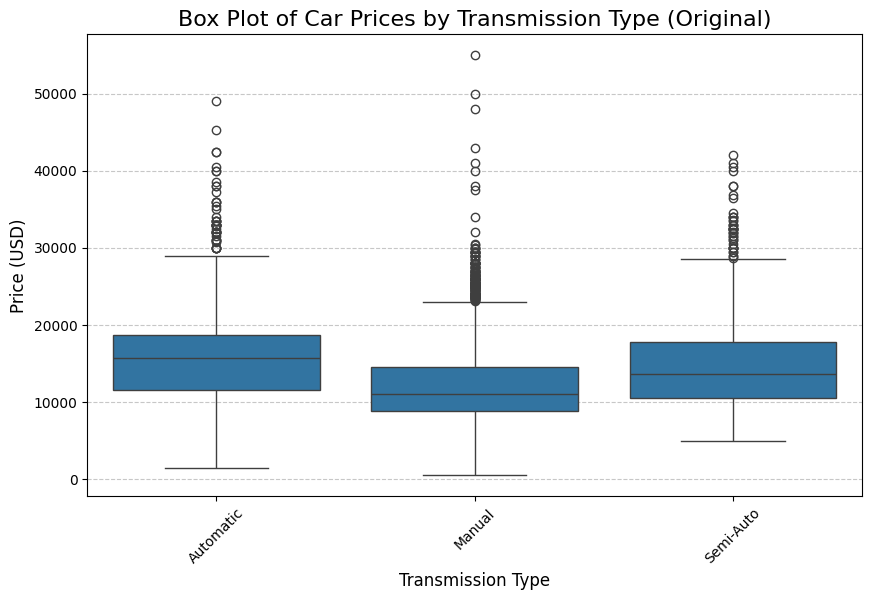

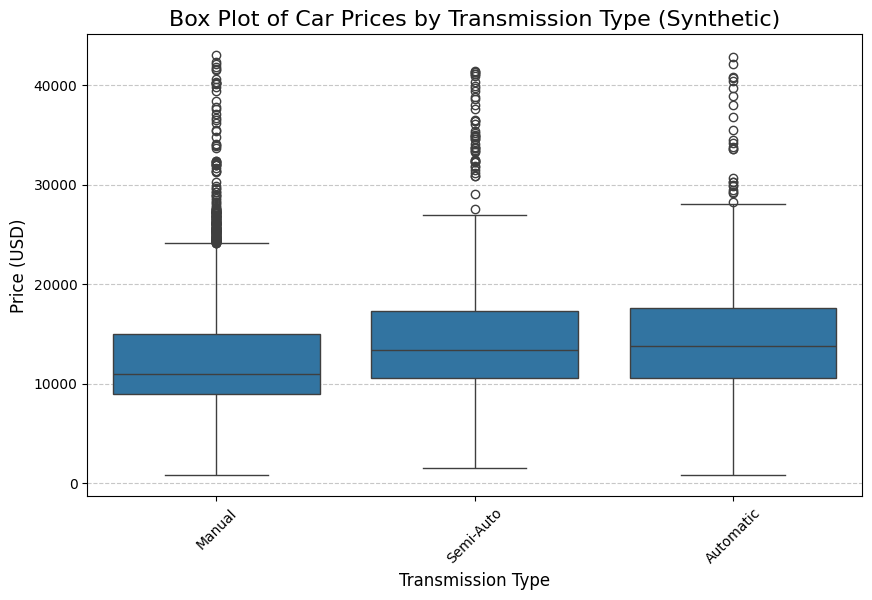

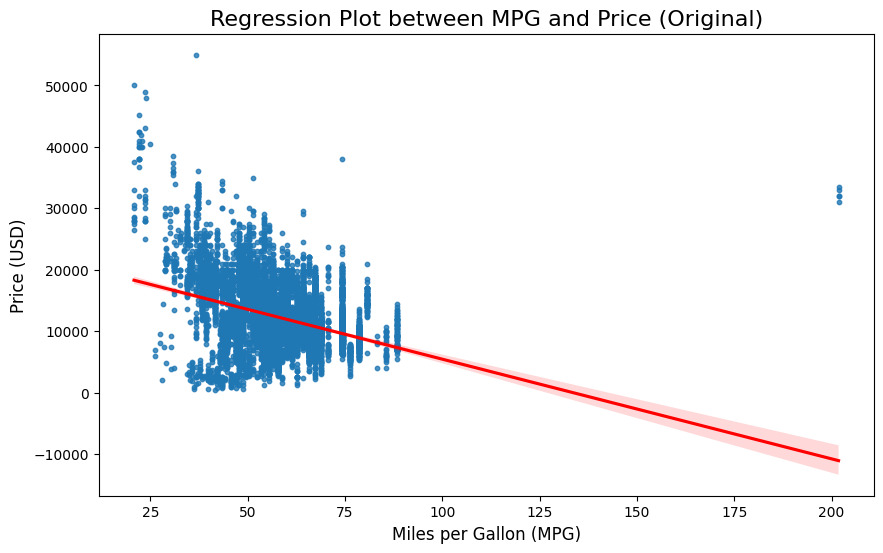

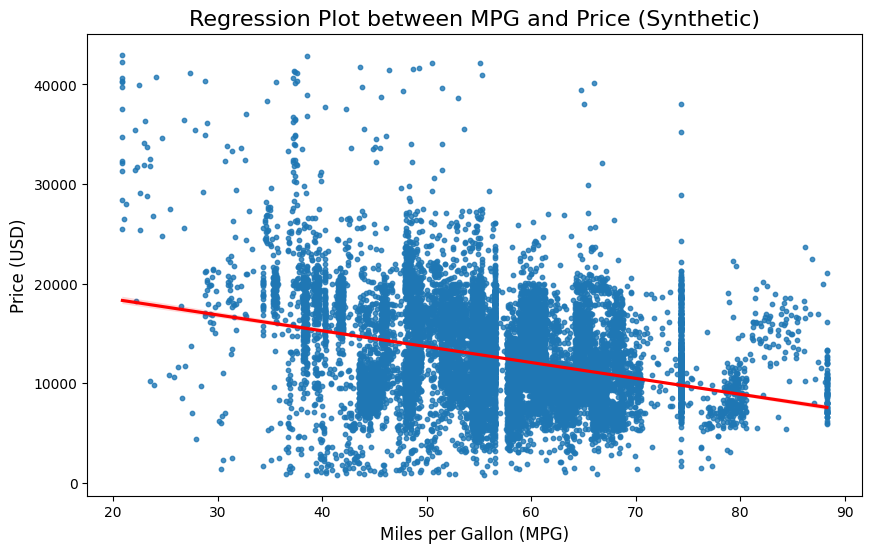

In [175]:
# Load the original and synthetic datasets
original_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
original_df = pd.read_csv(original_url)

# Load the synthetic dataset (assuming it is in the same directory as your script)
synthetic_df = pd.read_csv('synthetic_used_car_price_augmentation_mostly_ai.csv')

# 1. Box Plot for Transmission vs Price (Original Data)
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=original_df)
plt.title('Box Plot of Car Prices by Transmission Type (Original)', fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Box Plot for Transmission vs Price (Synthetic Data)
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=synthetic_df)
plt.title('Box Plot of Car Prices by Transmission Type (Synthetic)', fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Regression Plot between mpg and price (Original Data)
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=original_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Regression Plot between MPG and Price (Original)', fontsize=16)
plt.xlabel('Miles per Gallon (MPG)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.show()

# 4. Regression Plot between mpg and price (Synthetic Data)
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=synthetic_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Regression Plot between MPG and Price (Synthetic)', fontsize=16)
plt.xlabel('Miles per Gallon (MPG)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.show()


## Further comparison of the original and the synthetic data:

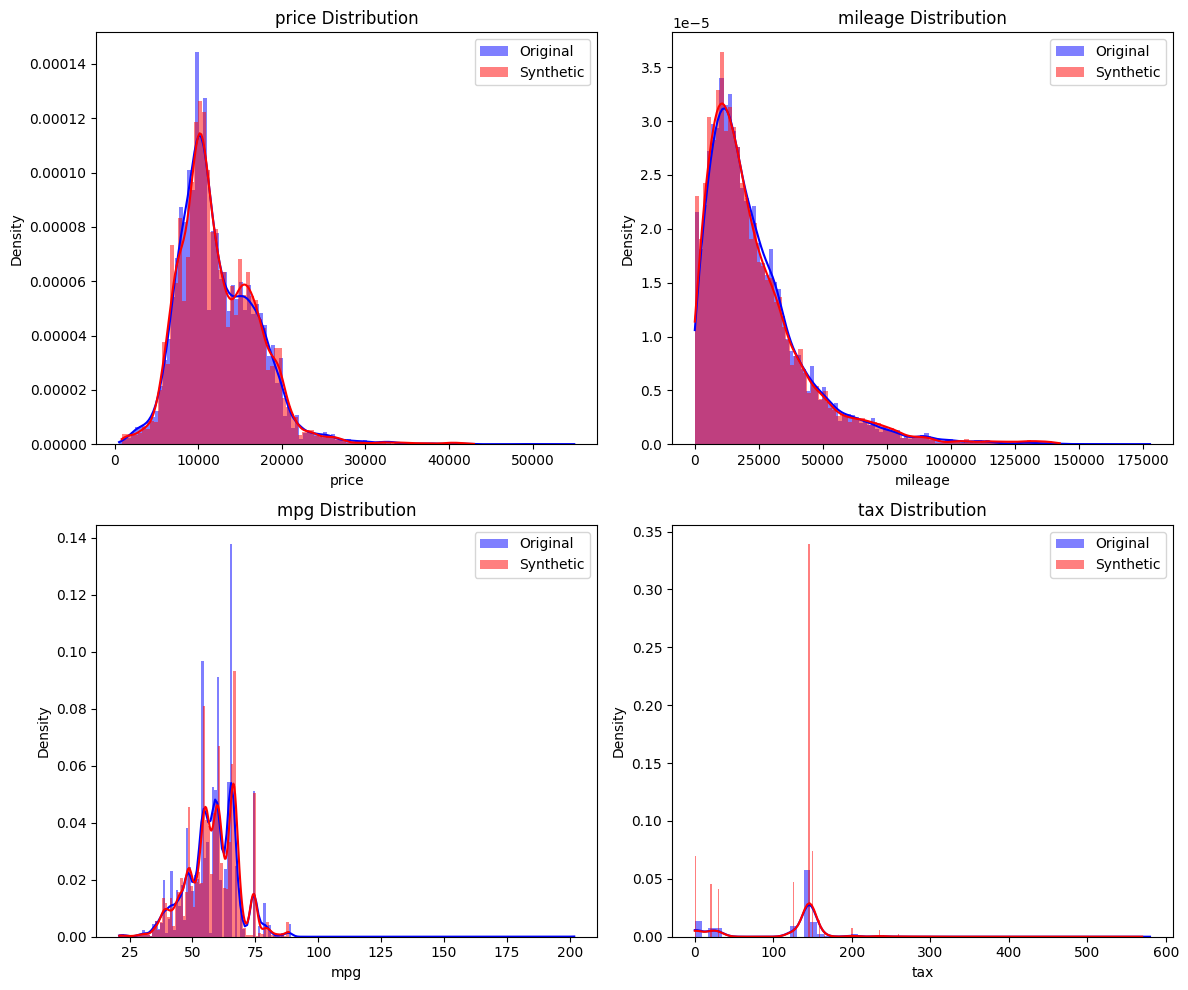

In [176]:
# List of features to compare
features = ['price', 'mileage', 'mpg', 'tax']

# Set up the plot
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(original_df[feature], color='blue', kde=True, label='Original', stat='density', linewidth=0)
    sns.histplot(synthetic_df[feature], color='red', kde=True, label='Synthetic', stat='density', linewidth=0)
    plt.title(f'{feature} Distribution')
    plt.legend()

plt.tight_layout()
plt.show()

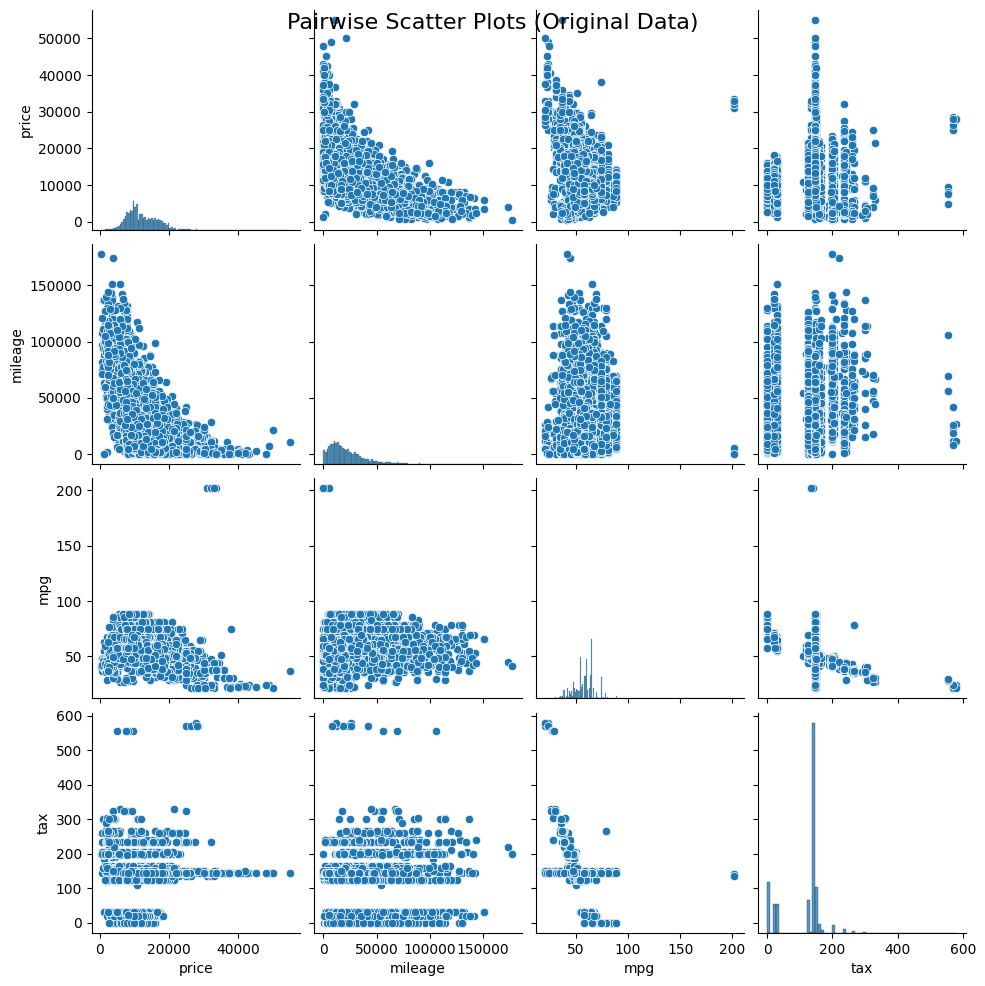

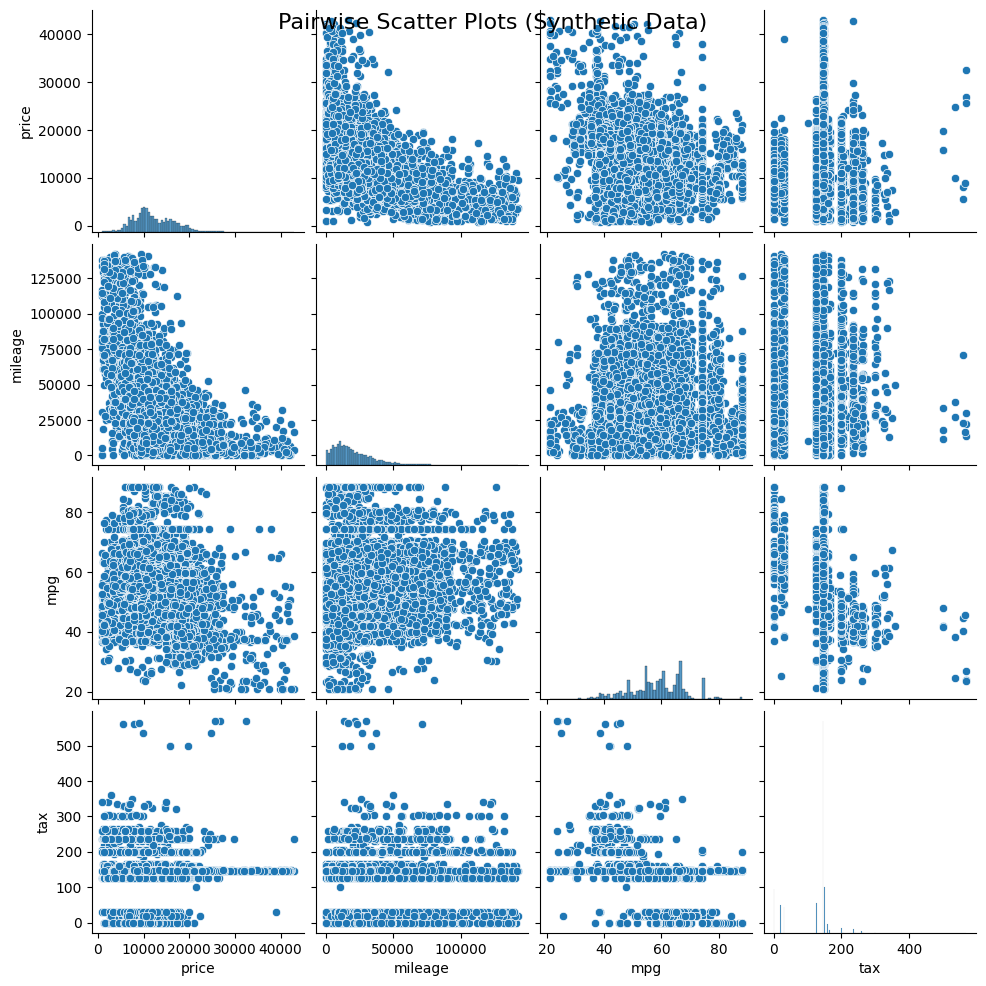

In [177]:
# Pair plot to visualize relationships between features
sns.pairplot(original_df[['price', 'mileage', 'mpg', 'tax']])
plt.suptitle('Pairwise Scatter Plots (Original Data)', fontsize=16)
plt.show()

sns.pairplot(synthetic_df[['price', 'mileage', 'mpg', 'tax']])
plt.suptitle('Pairwise Scatter Plots (Synthetic Data)', fontsize=16)
plt.show()


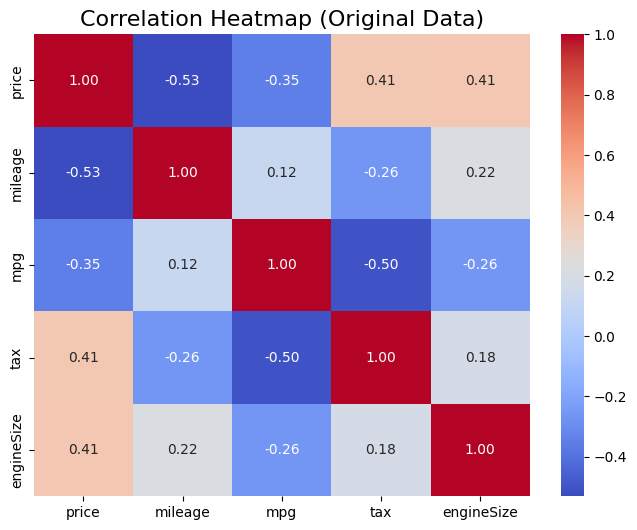

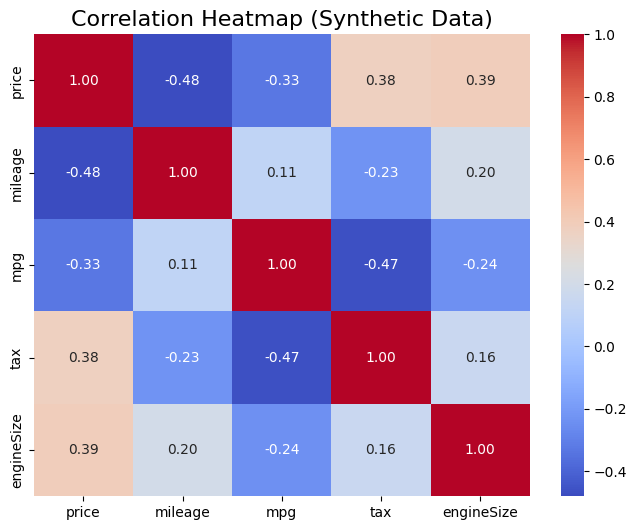

In [178]:
# Correlation matrix for the original dataset
plt.figure(figsize=(8, 6))
sns.heatmap(original_df[['price', 'mileage', 'mpg', 'tax', 'engineSize']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Original Data)', fontsize=16)
plt.show()

# Correlation matrix for the synthetic dataset
plt.figure(figsize=(8, 6))
sns.heatmap(synthetic_df[['price', 'mileage', 'mpg', 'tax', 'engineSize']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Synthetic Data)', fontsize=16)
plt.show()


In [179]:
from scipy.stats import ks_2samp

# KS test for price feature
ks_stat, ks_p_value = ks_2samp(original_df['price'], synthetic_df['price'])
print(f"KS Test for Price: Statistic={ks_stat}, p-value={ks_p_value}")

# KS test for mileage feature
ks_stat, ks_p_value = ks_2samp(original_df['mileage'], synthetic_df['mileage'])
print(f"KS Test for Mileage: Statistic={ks_stat}, p-value={ks_p_value}")

# KS test for mpg feature
ks_stat, ks_p_value = ks_2samp(original_df['mpg'], synthetic_df['mpg'])
print(f"KS Test for MPG: Statistic={ks_stat}, p-value={ks_p_value}")


KS Test for Price: Statistic=0.0200378492708449, p-value=0.0014527398505688298
KS Test for Mileage: Statistic=0.02098408104196814, p-value=0.0007227688582616716
KS Test for MPG: Statistic=0.13592341088723148, p-value=3.266818190191262e-145


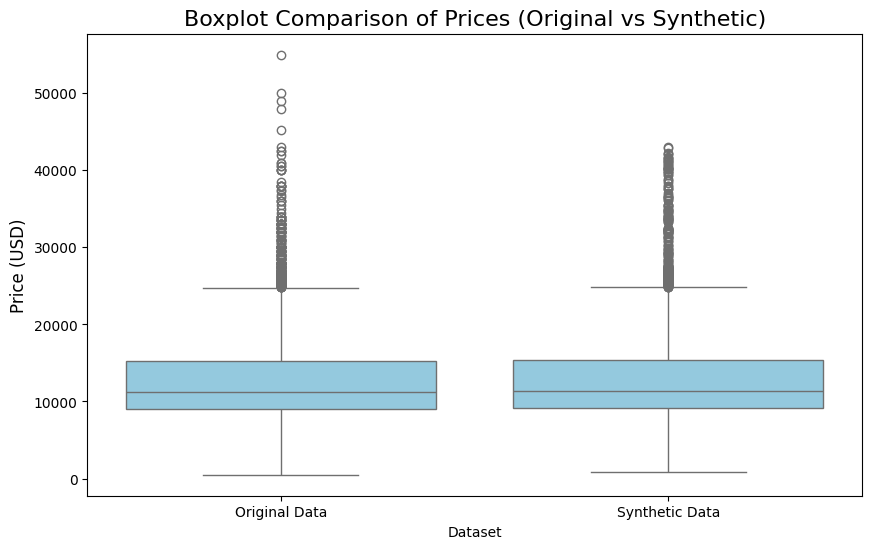

In [180]:
# Creating a 'Dataset' column to label the two datasets
comparison_df = pd.DataFrame({
    'Price': pd.concat([original_df['price'], synthetic_df['price']]),
    'Dataset': ['Original Data'] * len(original_df) + ['Synthetic Data'] * len(synthetic_df)
})

# Boxplot for price comparison between original and synthetic data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dataset', y='Price', data=comparison_df, color='skyblue')  # Use color instead of palette
plt.title('Boxplot Comparison of Prices (Original vs Synthetic)', fontsize=16)
plt.ylabel('Price (USD)', fontsize=12)
plt.show()
